## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 4
#### Nombre y Apellido:  Nicolás Ferragamo


***
## Filtrado


<div class="alert alert-block alert-info">
<b>1)</b> Para el siguiente filtro digital se pide:

</div>

 $$ y(k) = \frac{1}{N} \sum_{i=0}^{N-1} x(k-i)  $$
 
 Para N = [3; 5]

   a) El diagrama de polos y ceros y su respuesta de módulo y fase


<div class="alert alert-block alert-warning">
    <b>Respuesta:</b> Para el caso de <b>N = 3</b> obtnego los siguientes resultados:
    $$y(k) = \frac{1}{3} \sum_{i=0}^{2} x(k-i) $$
    $$ y(k) = \frac{1}{3} [x(k) + x(k-1) + x(k-2)]$$ Podemos ver que es un filtro promediador (LPF).
    
Podemos pensar a la constante como la respuesta al impulso de nuestro filtro y al filtro como una convolución entre la señal de entrada y la respuesta al impulso.
    $$ y(k) = x(k) \ast h(k)$$
    
Utilizando la transformada Z obtenemos lo siguiente:
$$ Y(z) = X(z) . H(z) $$

$$ Y(z) = \frac{X(z)}{3} + \frac{X(z).Z^{-1}}{3} + \frac{X(z).Z^{-2}}{3} $$

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{1}{3} [Z^0 + Z^{-1} + Z^{-2}]$$

$$ H(z) = \frac{1}{3} \frac{1 + Z^1 +Z^2}{Z^2}$$
    
<img src="TP4/1a.jpg" align="center" width="80%" /> 

</div>



   b) Corrobore su respuesta mediante la simulación computacional


In [4]:
## Inicialización del Notebook del TP4

import numpy as np
from pandas import DataFrame
from IPython.display import HTML
from scipy import signal as sig
import matplotlib.pyplot as plt
import control

# Insertar aquí el código para inicializar tu notebook
########################################################

import matplotlib as mpl
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

def vertical_flaten(a):
    
    return a.reshape(a.shape[0],1)


Z = [-0.5+0.8660254j -0.5-0.8660254j] 
 P = [0. 0.] 
 K = 0.3333333333333333 



<IPython.core.display.Javascript object>


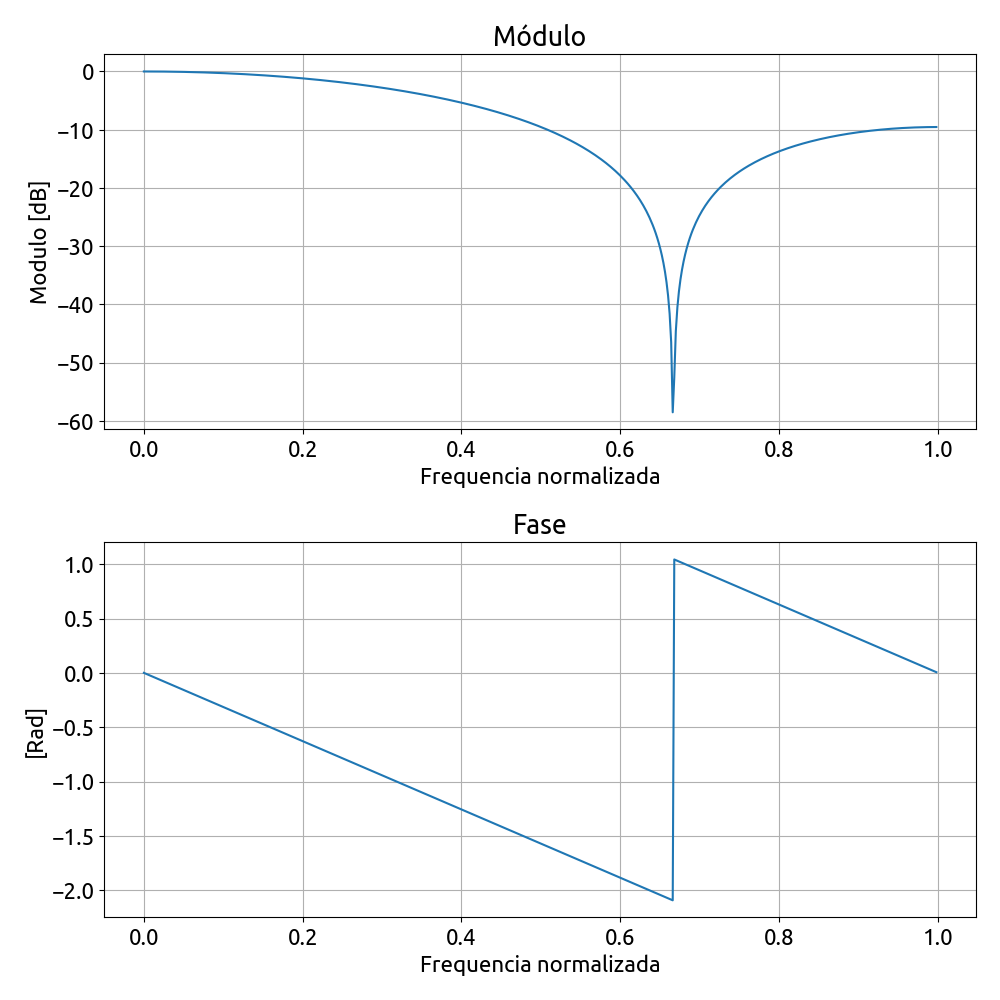


0.3333 z^2 + 0.3333 z + 0.3333
------------------------------
              z^2

dt = 1



<IPython.core.display.Javascript object>


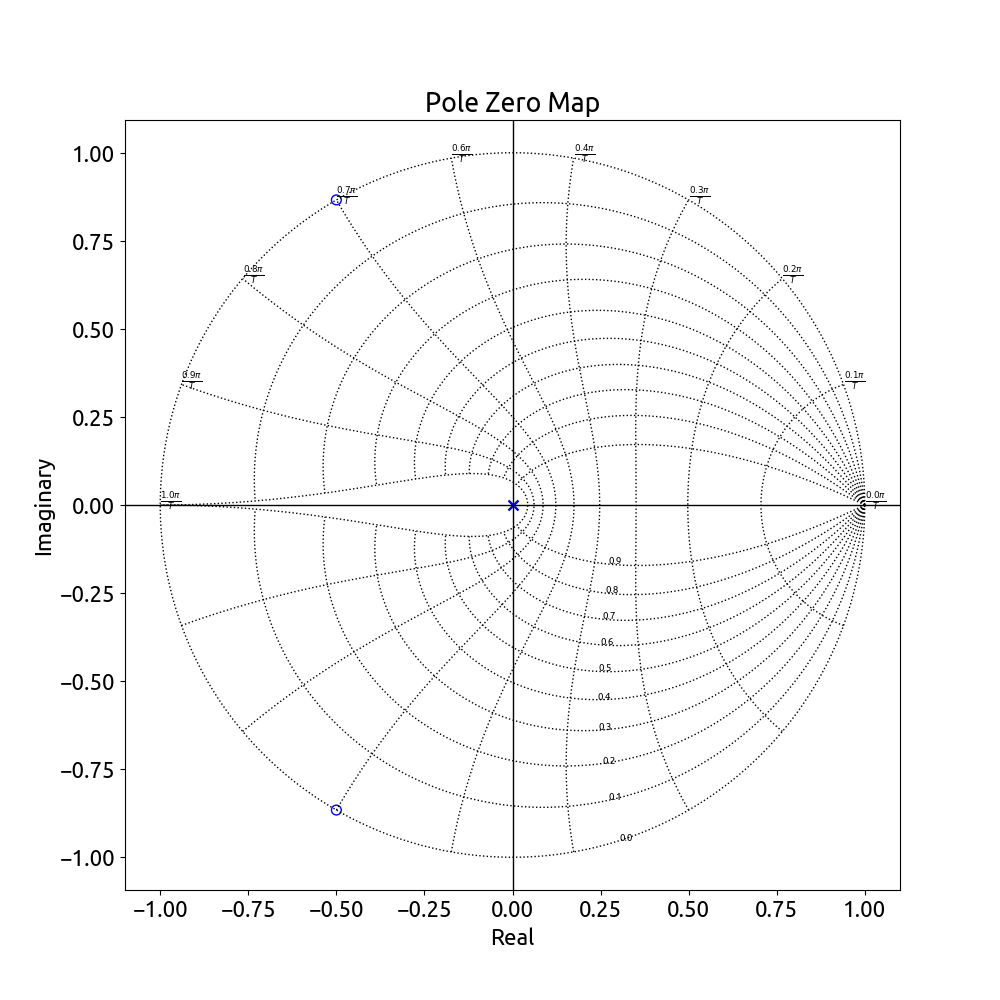

(array([0., 0.]), array([-0.5+0.8660254j, -0.5-0.8660254j]))

In [12]:
%matplotlib notebook
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

num = np.array([1/3, 1/3, 1/3])
den = np.array([1, 0, 0])

z, p, k = sig.tf2zpk(num,den)

print("Z =", z, "\n", "P =", p, "\n", "K =", k, "\n")

ww, hh = sig.freqz(num, den)
ww = ww / np.pi

eps = np.finfo(float).eps

plt.figure("Filtro FIR") 
ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Módulo')
ax1.plot(ww, 20 * np.log10(abs(hh)+eps))
ax1.set_xlabel('Frequencia normalizada')
ax1.set_ylabel('Modulo [dB]')
plt.grid()
ax2 = plt.subplot(2, 1, 2)
ax2.set_title('Fase')
ax2.plot(ww, np.angle(hh))
ax2.set_xlabel('Frequencia normalizada')
ax2.set_ylabel('[Rad]')
plt.grid()
plt.show()
plt.tight_layout()

tf = control.TransferFunction(num,den, 1)
print (tf)
control.pzmap(tf, Plot=True, title='Pole Zero Map', grid=True)



<div class="alert alert-block alert-warning">
    <b>Respuesta:</b>  De forma similar para el caso de <b> N = 5 </b>

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{1}{5} [Z^0 + Z^{-1} + Z^{-2} + Z^{-3} + Z^{-4}]$$

$$ H(z) = \frac{1}{3} \frac{1+ Z^1 + Z^2 + Z^3 + Z^4}{Z^4}$$



<img src="TP4/1b.jpg" align="center" width="80%" /> 

</div>


Z = [ 0.30901699+0.95105652j  0.30901699-0.95105652j -0.80901699+0.58778525j
 -0.80901699-0.58778525j] 
 P = [0. 0. 0. 0.] 
 K = 0.2 



<IPython.core.display.Javascript object>


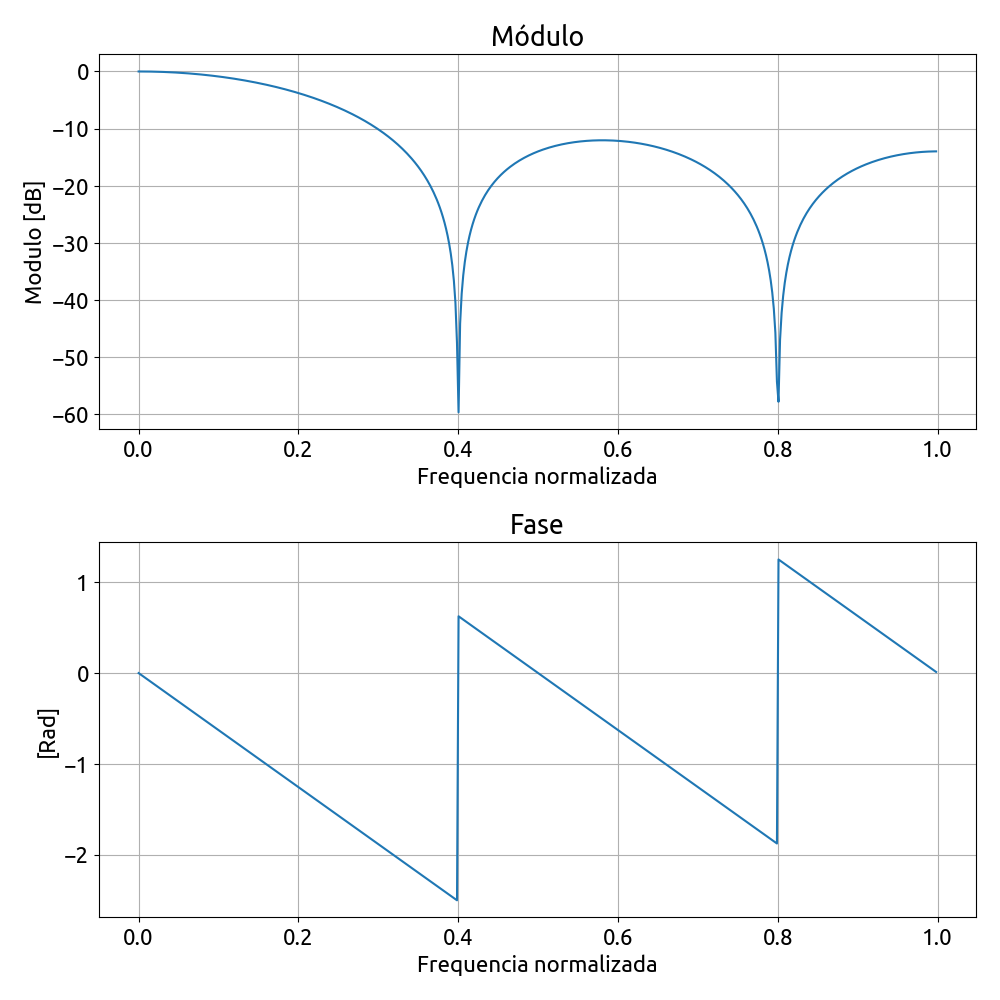


0.2 z^4 + 0.2 z^3 + 0.2 z^2 + 0.2 z + 0.2
-----------------------------------------
                   z^4

dt = 1



<IPython.core.display.Javascript object>


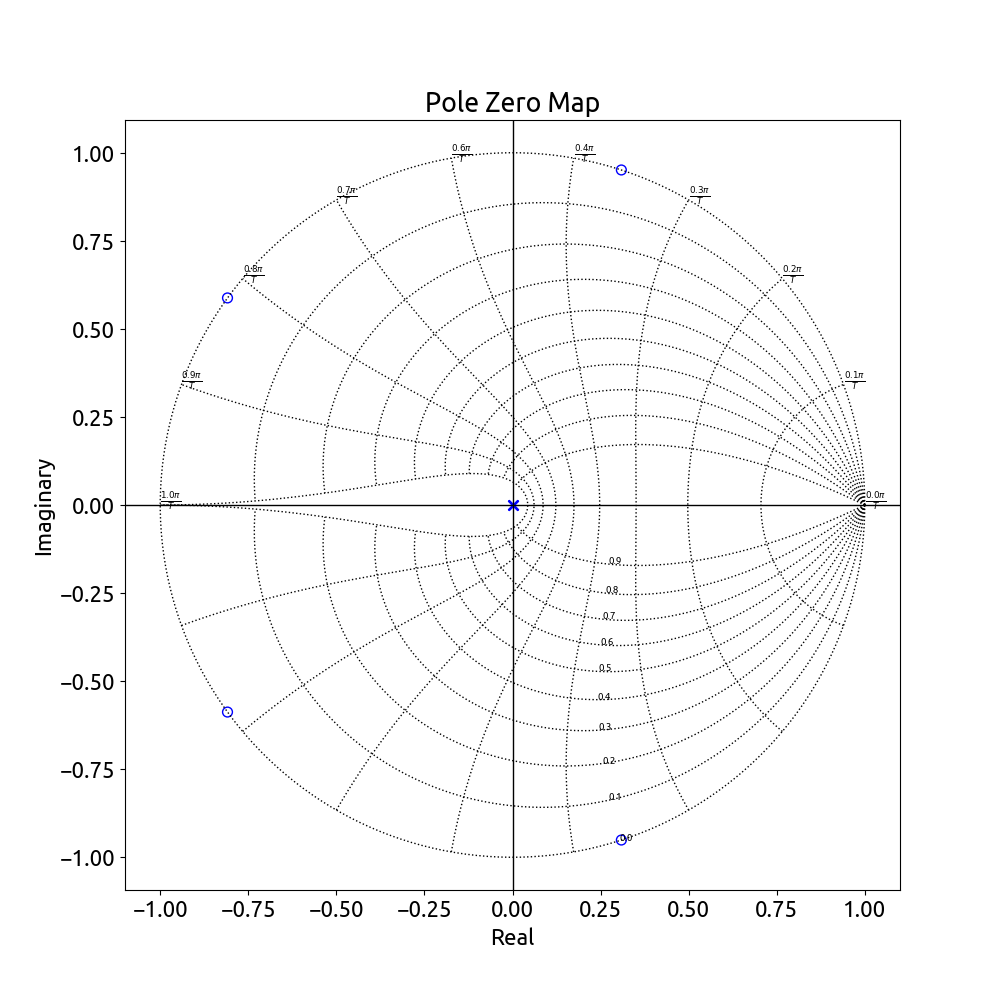

(array([0., 0., 0., 0.]),
 array([ 0.30901699+0.95105652j,  0.30901699-0.95105652j,
        -0.80901699+0.58778525j, -0.80901699-0.58778525j]))

In [11]:
num = np.array([1/5, 1/5, 1/5, 1/5, 1/5])
den = np.array([1, 0, 0, 0, 0])

z, p, k = sig.tf2zpk(num,den)

print("Z =", z, "\n", "P =", p, "\n", "K =", k, "\n")
ww, hh = sig.freqz(num, den)
ww = ww / np.pi

eps = np.finfo(float).eps

plt.figure("Filtro FIR") 
ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Módulo')
ax1.plot(ww, 20 * np.log10(abs(hh)+eps))
ax1.set_xlabel('Frequencia normalizada')
ax1.set_ylabel('Modulo [dB]')
plt.grid()
ax2 = plt.subplot(2, 1, 2)
ax2.set_title('Fase')
ax2.plot(ww, np.angle(hh))
ax2.set_xlabel('Frequencia normalizada')
ax2.set_ylabel('[Rad]')
plt.grid()
plt.show()
plt.tight_layout()


tf = control.TransferFunction(num,den, 1)
print (tf)
control.pzmap(tf, Plot=True, title='Pole Zero Map', grid=True)


<div class="alert alert-block alert-info">
<b>2)</b> Para el siguiente filtro digital se pide:

</div>


$$ h(k) = (-1, 1) $$
 


   a) El diagrama de polos y ceros y su respuesta de módulo y fase


<div class="alert alert-block alert-warning">
    <b>Respuesta:</b>  
    
$$ H(z) = -1 - Z$$
$$ H(z) = \frac{-Z + 1}{Z}$$

Para obtener el módulo y la fase utilizo el remplazo $Z = e^{j\omega_d}$ con la cual trabajamos en el circulo unitario $j\omega$

## <b>Módulo</b>

$$ \mid H(z) \mid_{Z = e^{j\omega_d}} = \mid \frac{1 - e^{j\omega_d}}{e^{j\omega_d}} \mid$$

$$ H(e^{j\omega_d}) = \mid \frac{1 - e^{j\omega_d}}{e^{j\omega_d}} \mid$$


$$ H(e^{j\omega_d}) = \mid \frac{e^{j\omega_d/2}}{e^{j\omega_d}} (e^{-j\omega_d/2} - e^{j\omega_d/2}) \mid$$

$$ H(e^{j\omega_d}) = \mid -e^{-j\omega_d/2} 2.j. sin(\frac{w_d}{2}) \mid$$

$$ H(e^{j\omega_d}) =  2. sin(\frac{w_d}{2}) $$

## <b>Fase</b>

$$ Arg\{H(z)\}_{Z = e^{j\omega_d}} = arg\{\frac{1 - e^{j\omega_d}}{e^{j\omega_d}}\}$$

$$ Arg\{H(z)\} = Arg\{e^{-j\omega_d/2} + e^{j\pi/2} + e^{-j\pi} \} $$

$$ Arg\{H(z)\} = \frac{\pi}{2} - \omega_d - \pi$$

$$ Arg\{H(z)\} = -\frac{\pi}{2} - \omega_d $$


Es un filtro pasa alto.

</div>


<img src="TP4/2.jpg" align="center" width="80%" /> 


   b) Corrobore su respuesta mediante simulación computacional


Z = [1.] 
 P = [0.] 
 K = -1.0 



<IPython.core.display.Javascript object>


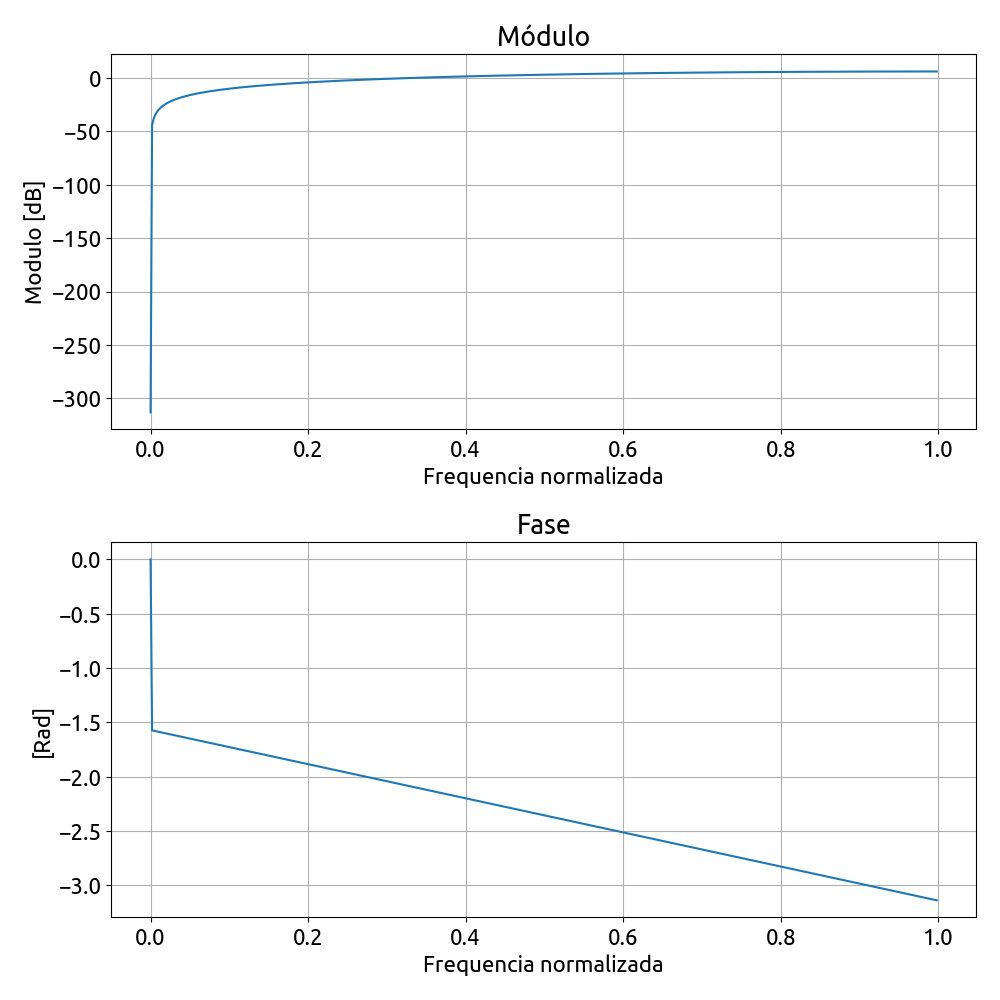


-z + 1
------
  z

dt = 1



<IPython.core.display.Javascript object>


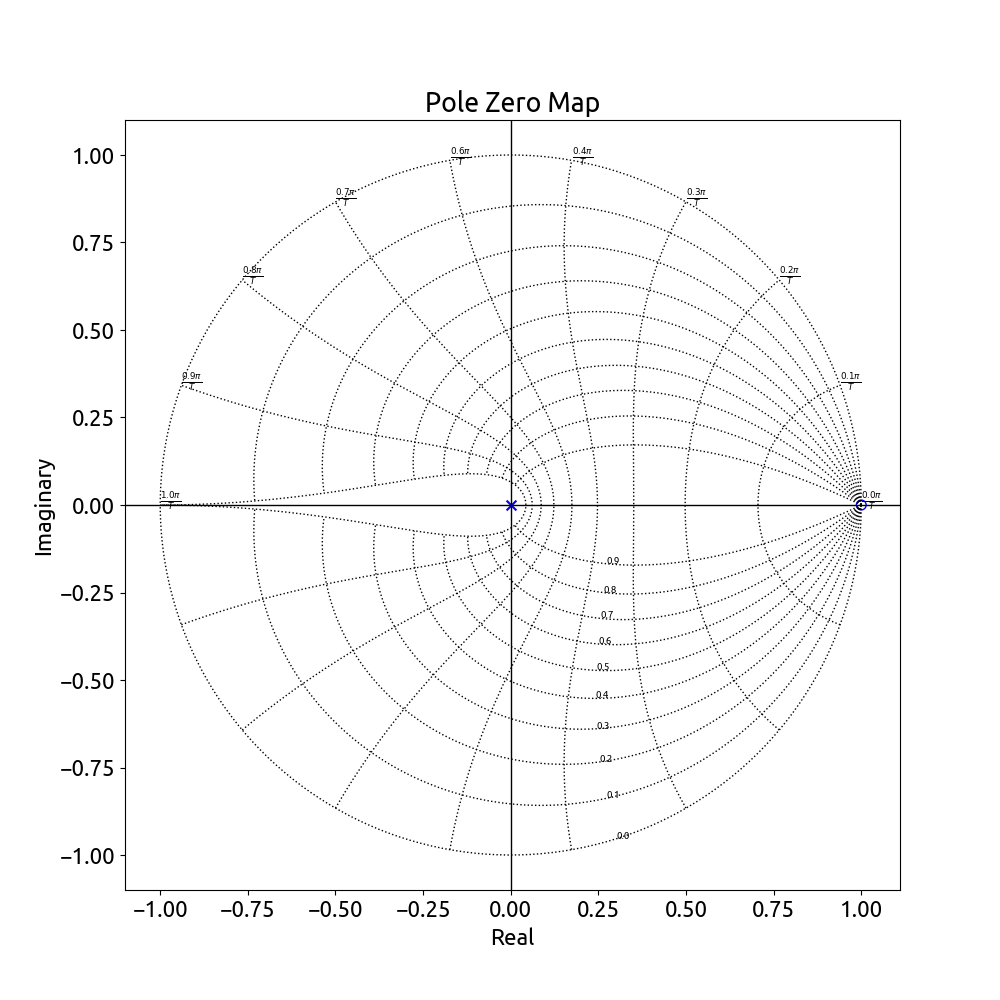

(array([0.]), array([1.]))

In [10]:
%matplotlib notebook
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
num = np.array([-1, 1])
den = np.array([1, 0])

z, p, k = sig.tf2zpk(num,den)
print("Z =", z, "\n", "P =", p, "\n", "K =", k, "\n")
ww, hh = sig.freqz(num, den)
ww = ww / np.pi

eps = np.finfo(float).eps
plt.figure("Filtro FIR") 
ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Módulo')
ax1.plot(ww, 20 * np.log10(abs(hh)+eps))
ax1.set_xlabel('Frequencia normalizada')
ax1.set_ylabel('Modulo [dB]')
plt.grid()
ax2 = plt.subplot(2, 1, 2)
ax2.set_title('Fase')
ax2.plot(ww, np.angle(hh))
ax2.set_xlabel('Frequencia normalizada')
ax2.set_ylabel('[Rad]')
plt.grid()
plt.show()
plt.tight_layout()

tf = control.TransferFunction(num,den, 1)
print (tf)
control.pzmap(tf, Plot=True, title='Pole Zero Map', grid=True)



<div class="alert alert-block alert-info">
<b>3)</b> Para el siguiente filtro digital se pide:

</div>


<img src="./comb.png" align="center" width="30%" /> 


Para $N= (2; 4)$ y $b = -1$

   a) El diagrama de polos y ceros y su respuesta de módulo y fase


<div class="alert alert-block alert-warning">
    <b>Respuesta:</b>  $ X(z) = X(z) + X(z)Z^{-N}b $ 
    
# Para el caso de <b> N = 2 </b>
$$ X(z) = X(z) + -X(z)Z^{-2} $$ 

$$ H(z) = \frac{Y(z)}{X(z)}= \frac{Z^2 -1}{Z^2}$$


Para obtener el módulo y la fase utilizo el remplazo $Z = e^{j\omega_d}$ con la cual trabajamos en el circulo unitario $j\omega$

## <b>Módulo</b>

$$ \mid H(z) \mid_{Z = e^{j\omega_d}} = \mid \frac{ e^{j2\omega_d} -1}{e^{j2\omega_d}} \mid$$

$$ H(e^{j\omega_d}) = \mid \frac{ e^{j2\omega_d} -1}{e^{j2\omega_d}} \mid$$

$$ H(e^{j\omega_d}) = \mid \frac{e^{j\omega_d}}{e^{j2\omega_d}} (e^{j\omega_d} - e^{-j\omega_d}) \mid$$

$$ H(e^{j\omega_d}) = \mid e^{-j\omega_d}(e^{j\omega_d} - e^{-j\omega_d}) \mid$$

$$ H(e^{j\omega_d}) = \mid e^{-j\omega_d} 2.j. sin(w_d) \mid$$

$$ H(e^{j\omega_d}) =  2. sin(w_d) $$

## <b>Fase</b>

$$ Arg\{H(z)\}_{Z = e^{j\omega_d}} = arg\{\frac{ e^{j2\omega_d} -1}{e^{j2\omega_d}}\}$$

$$ Arg\{H(z)\} = Arg \{e^{-j\omega_d} + e^{j\pi/2} \} $$

$$ Arg\{H(z)\} = \frac{\pi}{2} - \omega_d $$


Es un filtro pasa banda.

</div>

<img src="TP4/3a.jpg" align="center" width="80%" /> 


   b) Corrobore su respuesta mediante simulación computacional


Z = [-1.  1.] 
 P = [0. 0.] 
 K = 1.0 



<IPython.core.display.Javascript object>


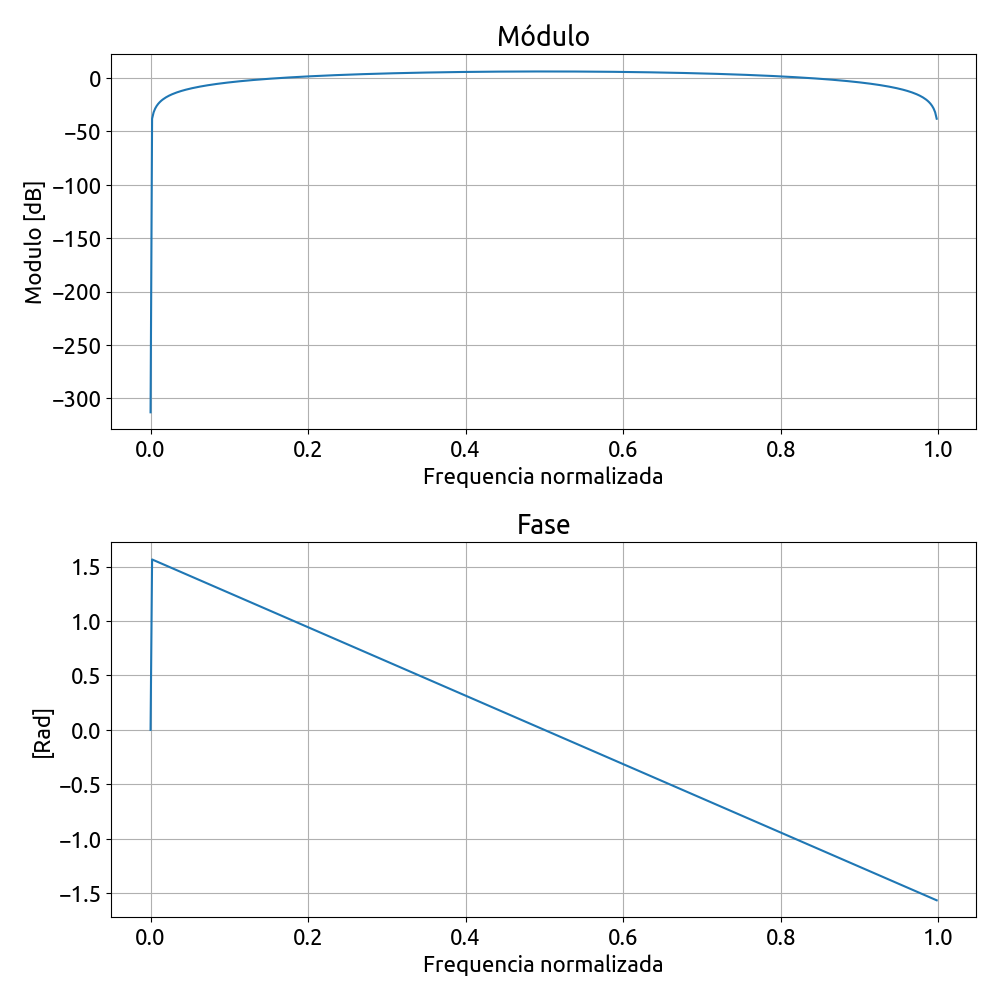


z^2 - 1
-------
  z^2

dt = 1



<IPython.core.display.Javascript object>


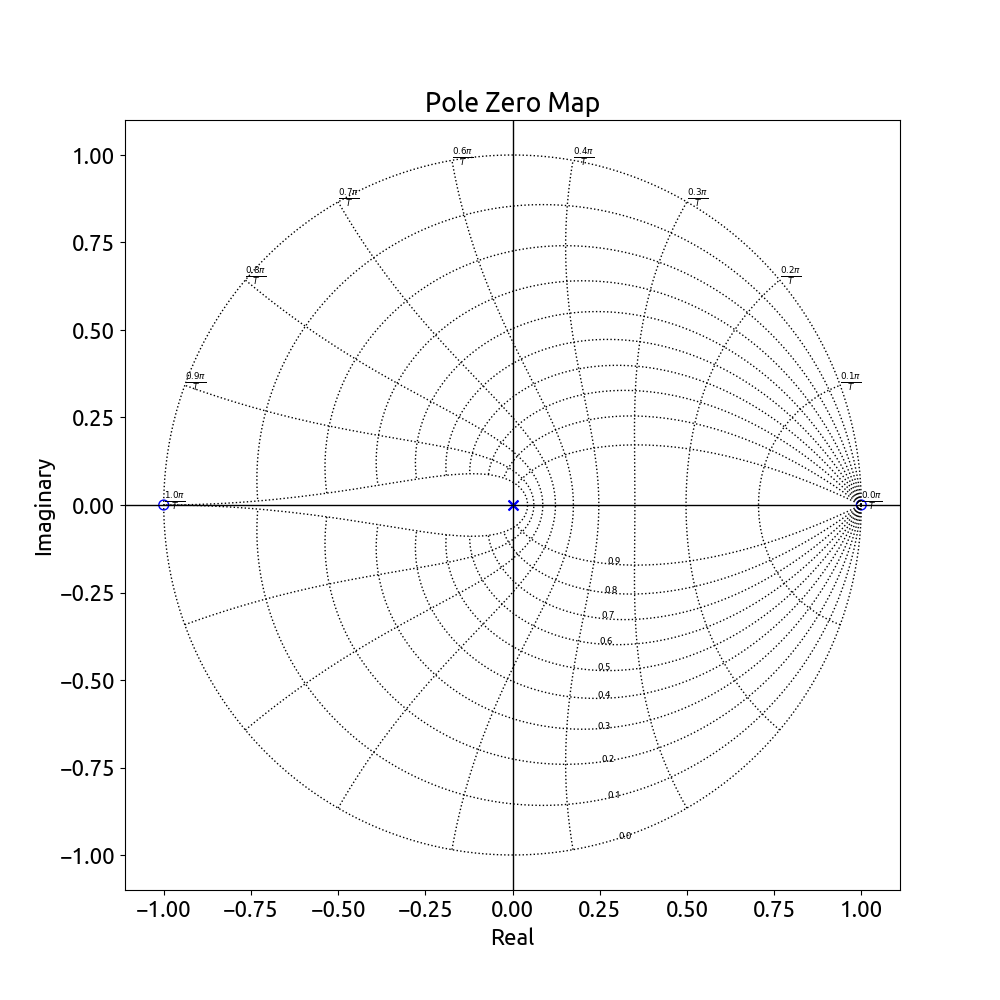

(array([0., 0.]), array([-1.,  1.]))

In [14]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################
num = np.array([1,0, -1]) #numerador de  H[b2, b1, b0]
den = np.array([1, 0, 0])

z, p, k = sig.tf2zpk(num,den)

ww, hh = sig.freqz(num, den)
print("Z =", z, "\n", "P =", p, "\n", "K =", k, "\n")
ww, hh = sig.freqz(num, den)
ww = ww / np.pi

eps = np.finfo(float).eps


plt.figure("Filtro FIR") 
ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Módulo')
ax1.plot(ww, 20 * np.log10(abs(hh+eps)))
ax1.set_xlabel('Frequencia normalizada')
ax1.set_ylabel('Modulo [dB]')
plt.grid()
ax2 = plt.subplot(2, 1, 2)
ax2.set_title('Fase')
ax2.plot(ww, np.angle(hh))
ax2.set_xlabel('Frequencia normalizada')
ax2.set_ylabel('[Rad]')
plt.grid()
plt.show()
plt.tight_layout()



tf = control.TransferFunction(num,den, 1)
print (tf)
control.pzmap(tf, Plot=True, title='Pole Zero Map', grid=True)


<div class="alert alert-block alert-warning">
    <b>Respuesta:</b>  $ X(z) = X(z) + X(z)Z^{-N}b $ 
    
# Para el caso de <b> N = 4 </b>
$$ X(z) = X(z) + -X(z)Z^{-4} $$ 

$$ H(z) = \frac{Y(z)}{X(z)}= \frac{Z^4 -1}{Z^4}$$


Para obtener el módulo y la fase utilizo el remplazo $Z = e^{j\omega_d}$ con la cual trabajamos en el circulo unitario $j\omega$

## <b>Módulo</b>

$$ \mid H(z) \mid_{Z = e^{j\omega_d}} = \mid \frac{ e^{j4\omega_d} -1}{e^{j4\omega_d}} \mid$$

$$ H(e^{j\omega_d}) = \mid \frac{ e^{j4\omega_d} -1}{e^{j4\omega_d}} \mid$$

$$ H(e^{j\omega_d}) = \mid \frac{e^{2j\omega_d}}{e^{j4\omega_d}} (e^{2j\omega_d} - e^{-2j\omega_d}) \mid$$

$$ H(e^{j\omega_d}) = \mid e^{-2j\omega_d}(e^{2j\omega_d} - e^{-2j\omega_d}) \mid$$

$$ H(e^{j\omega_d}) = \mid e^{-2j\omega_d} 2.j. sin(2w_d) \mid$$

$$ H(e^{j\omega_d}) =  2. sin(2w_d) $$

## <b>Fase</b>

$$ Arg\{H(z)\}_{Z = e^{j\omega_d}} = arg\{\frac{ e^{j4\omega_d} -1}{e^{j4\omega_d}}\}$$

$$ Arg\{H(z)\} = Arg \{e^{-2j\omega_d} + e^{j\pi/2} \} $$

$$ Arg\{H(z)\} = \frac{\pi}{2} - 2\omega_d $$


Es un filtro elimina banda (filtro notch).

</div>

<img src="TP4/3b.jpg" align="center" width="80%" /> 

Z = [-1.00000000e+00+0.j  8.32667268e-17+1.j  8.32667268e-17-1.j
  1.00000000e+00+0.j] 
 P = [0. 0. 0. 0.] 
 K = 1.0 



<IPython.core.display.Javascript object>


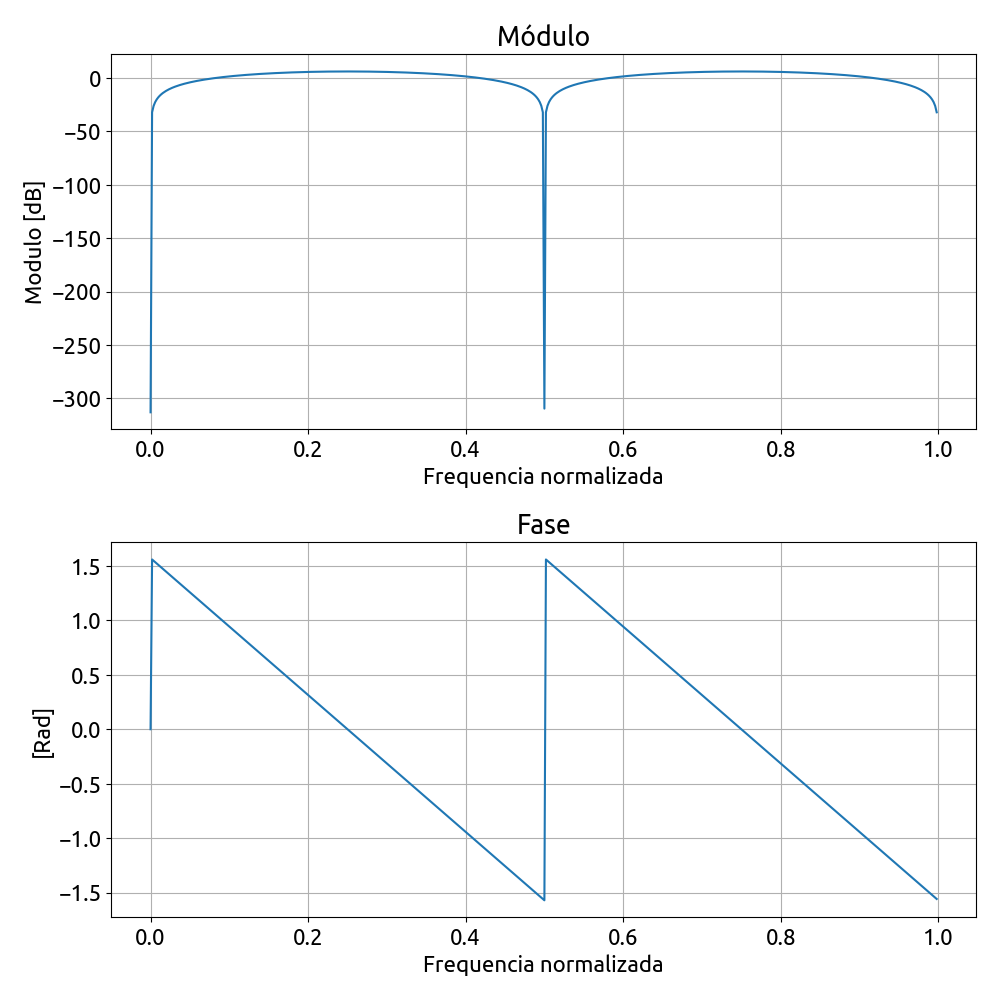


z^4 - 1
-------
  z^4

dt = 1



<IPython.core.display.Javascript object>


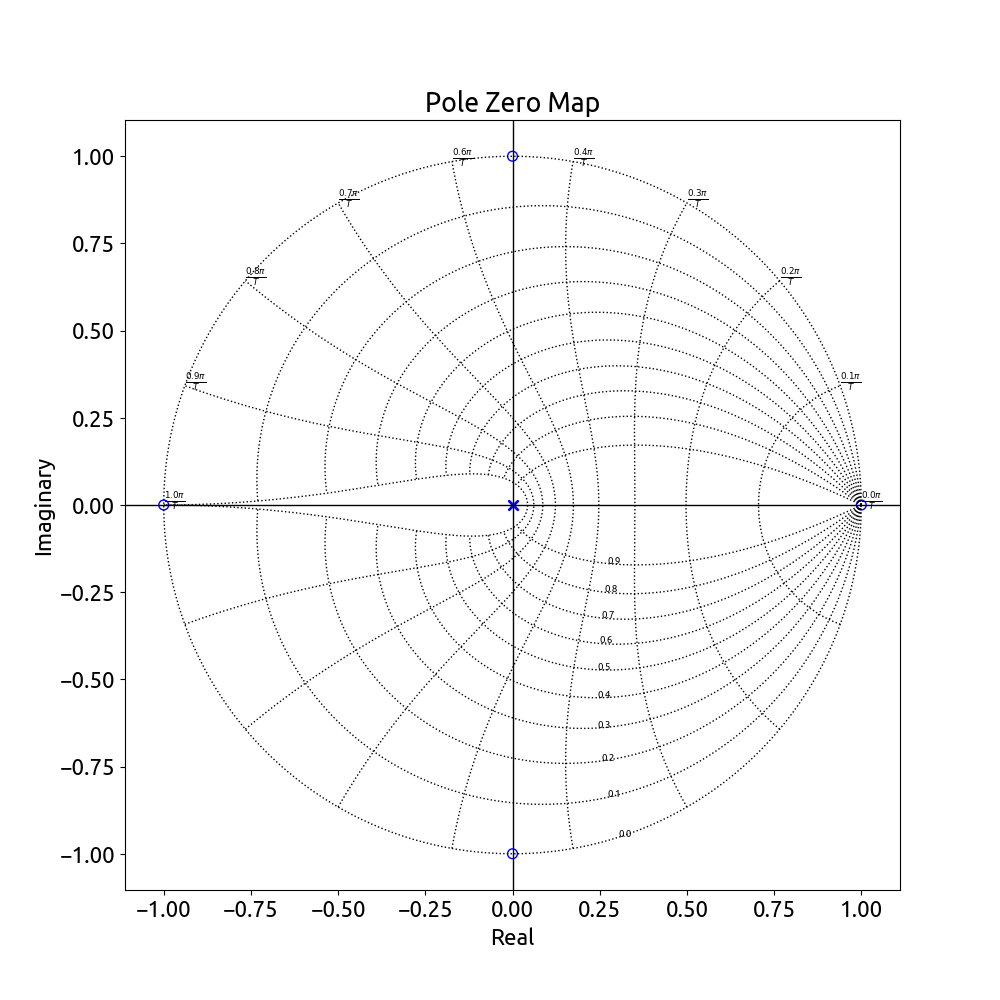

(array([0., 0., 0., 0.]),
 array([-1.00000000e+00+0.j,  8.32667268e-17+1.j,  8.32667268e-17-1.j,
         1.00000000e+00+0.j]))

In [15]:
num = np.array([1,0, 0, 0, -1]) #numerador de  H[b2, b1, b0]
den = np.array([1, 0, 0, 0, 0])

z, p, k = sig.tf2zpk(num,den)

ww, hh = sig.freqz(num, den)
print("Z =", z, "\n", "P =", p, "\n", "K =", k, "\n")
ww, hh = sig.freqz(num, den)
ww = ww / np.pi

eps = np.finfo(float).eps


plt.figure("Filtro FIR") 
ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Módulo')
ax1.plot(ww, 20 * np.log10(abs(hh+eps)))
ax1.set_xlabel('Frequencia normalizada')
ax1.set_ylabel('Modulo [dB]')
plt.grid()
ax2 = plt.subplot(2, 1, 2)
ax2.set_title('Fase')
ax2.plot(ww, np.angle(hh))
ax2.set_xlabel('Frequencia normalizada')
ax2.set_ylabel('[Rad]')
plt.grid()
plt.show()
plt.tight_layout()



tf = control.TransferFunction(num,den, 1)
print (tf)
control.pzmap(tf, Plot=True, title='Pole Zero Map', grid=True)

<div class="alert alert-block alert-info">
<b>4)</b> En el archivo <i>ECG_TP4.mat</i> encontrará un registro electrocardiográfico (ECG) registrado durante una prueba de esfuerzo, junto con una serie de variables descriptas a continuación. Diseñe y aplique los filtros digitales necesarios para mitigar las siguientes fuentes de contaminación:
</div>

 - Ruido causado por el movimiento de los electrodos (Alta frecuencia)
 - Ruido muscular (Alta frecuencia)
 - Movimiento de la línea de base del ECG, inducido en parte por la respiración (Baja frecuencia)
 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Los latidos presentes en el registro de ECG, alineados y clasificados (de origen normal y ventricular) poseen las siguientes características temporales y frecuenciales:
</div>


<img src="./latidos_tiempo.png" align="center" width="80%" /> 

<img src="./latido_promedio.png" align="center" width="80%" /> 

<img src="./latidos_espectro.png" align="center" width="80%" /> 


### Archivo *ECG_TP4.mat*
(variables)
 - **ecg_lead**: Registro de ECG muestreado a $fs=1$ KHz durante una prueba de esfuerzo
 - **qrs_pattern1**: Complejo de ondas QRS normal
 - **heartbeat_pattern1**: Latido normal
 - **heartbeat_pattern2**: Latido de origen ventricular
 - **qrs_detections**: vector con las localizaciones (en # de muestras) donde ocurren los latidos
 
a) Establezca una plantilla de diseño para los filtros digitales que necesitará para que la señal de ECG se asemeje a los latidos promedio en cuanto a *suavidad* de los trazos y nivel isoeléctrico nulo.
 

In [16]:
# Defina la plantilla del filtro

fs0 = 0.05# fin de la banda de detenida 0
fc0 = 0.5 # comienzo de la banda de paso
fc1 = 35 # fin de la banda de paso
fs1 = 50 # comienzo de la banda de detenida 1


b) ¿Cómo obtuvo dichos valores? 
 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

c) Diseñe **al menos** dos filtros FIR y dos IIR para su comparación. Verifique que la respuesta en frecuencia responda a la plantilla de diseño
  

In [ ]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################




d) Evalúe el rendimiento de los filtros que haya diseñado: 

 1. Verifique que filtra las señales interferentes
 2. Verifique que es inocuo en las zonas donde no hay interferentes



In [ ]:

# Segmentos de interés #
########################
# Puede tomar como referencia los siguientes segmentos, aunque si lo considera, también
# puede incluir otros que considere importantes para evaluar el rendimiento.

zonas_con_interf_baja_frec = ( 
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )


zonas_sin_interf = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

##########################################
# Acá podés generar los gráficos pedidos #
##########################################




<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>5)</b> Utilice las siguientes metodologías <b>no lineales</b> de estimación-substracción para la remoción de la interferencia de línea de base, y compare con las técnicas lineales del punto anterior en las mismas regiones. Luego discuta las ventajas y desventajas de cada técnica.
</div>

a) Estimación del movimiento de línea de base a partir del filtrado de mediana. A partir de la siguiente estimación del movimiento de línea de base 

$$ \hat{b} = \mathop{med}_{600} \{ \mathop{med}_{200} \{s\} \} $$

Donde $s$ representa la señal de ECG a partir de la que estimamos el movimiento de la línea de base $ \hat{b}$. El operador $\mathop{med}_{200}$ calcula muestra a muestra la mediana en los 200 ms previos a la muestra actual. Luego dicha estimación la substraemos para estimar la actividad eléctrica cardíaca $\hat{x}$

$$ \hat{x} = s - \hat{b} $$


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar la implementación del <a href="https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html#median-filter">filtro de mediana provista en <b>scipy.signal</b></a>
</div>

In [ ]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################




<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

b) Estimación del movimiento de línea de base a partir de los segmentos isoeléctricos de cada latido. A partir de las detecciones provistas, puede estimar aproximadamente el nivel isoeléctrico, es decir el momento donde la actividad eléctrica cardíaca es **nula**. El intervalo entre la onda P y Q, es un buen momento para estimar las características de las señales interferentes que originan el movimiento de la línea de base.

<img src="./pq.png" align="center" width="80%" /> 

Para la localización del segmento PQ puede valerse de la localización de cada latido (líneas rojas verticales) y a partir de la misma, anticipar un tiempo adecuado de manera tal de no incluir la onda P ni Q. Puede ayudarse con el latido promedio de un latido normal para establecer dicho intervalo.

Recuerde que la señal de línea de base debe estar muestreada a la misma frecuencia que el ECG, por lo que debería remuestrear dicha señal (puede usar la función de interpolación spline para ello).

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar la función de interpolación <a href="https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.CubicSpline.html">spline <b>scipy.interpolate.CubicSpline</b></a>
</div>

In [ ]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################




<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>6)</b> Para la señal de ECG provista junto con este documento, aplique el concepto de <b>filtro adaptado</b> y otras técnicas de filtrado digital para diseñar un detector de latidos. Los patrones provistos son:

</div>


 - **qrs_pattern1**: Complejo de ondas QRS normal
 - **heartbeat_pattern1**: Latido normal
 - **heartbeat_pattern2**: Latido de origen ventricular
 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Revise el concepto de filtro adaptado en <a href="http://en.wikipedia.org/wiki/Matched_filter">Wikipedia</a>, o la bibliografía de la materia (Porat 14.4.9).
</div>

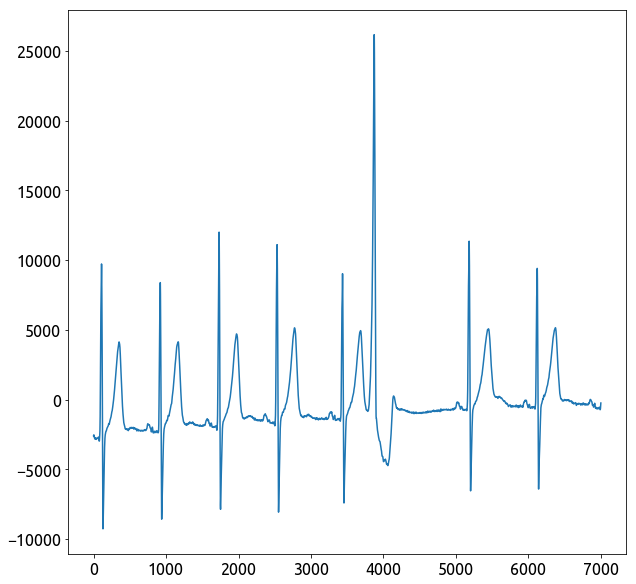

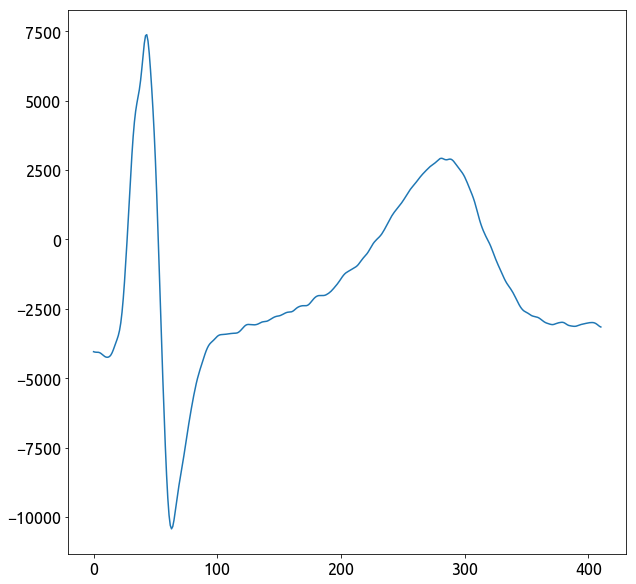

In [54]:
import scipy.io as sio

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

# para listar las variables que hay en el archivo
#io.whosmat('ECG_TP4.mat')
mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])
N = len(ecg_one_lead)

hb_1 = vertical_flaten(mat_struct['heartbeat_pattern1'])

plt.figure(1)
plt.plot(ecg_one_lead[5000:12000])

plt.figure(2)
plt.plot(hb_1)



a) Explique conceptualmente cómo podría realizar un detector de latidos con la señal resultante del filtro adaptado. Discuta la utilidad y limitaciones de este método. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

   
   b) Realice la detección de los latidos, comparando las detecciones obtenidas con las que se incluyen en la variable **qrs_detections**. Proponga alguna métrica para cuantificar las diferencias.


In [ ]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

